In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [6]:
p.fit(X,y)

Perceptron()

In [8]:
print(p.intercept_)
print(p.coef_)

[-25.]
[[ 40.26 -36.  ]]


In [9]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

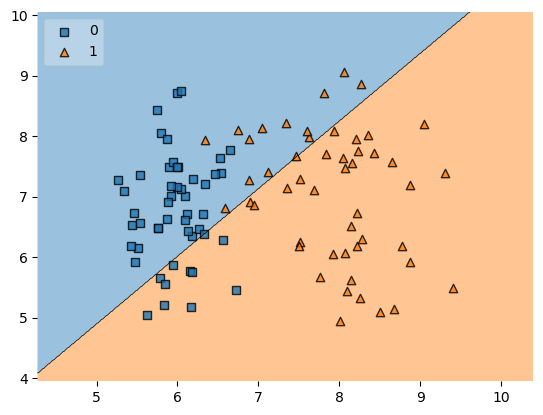

In [10]:
plot_decision_regions(X.values,y.values, clf=p, legend=2)

In [11]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                          n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,
                          class_sep=10)

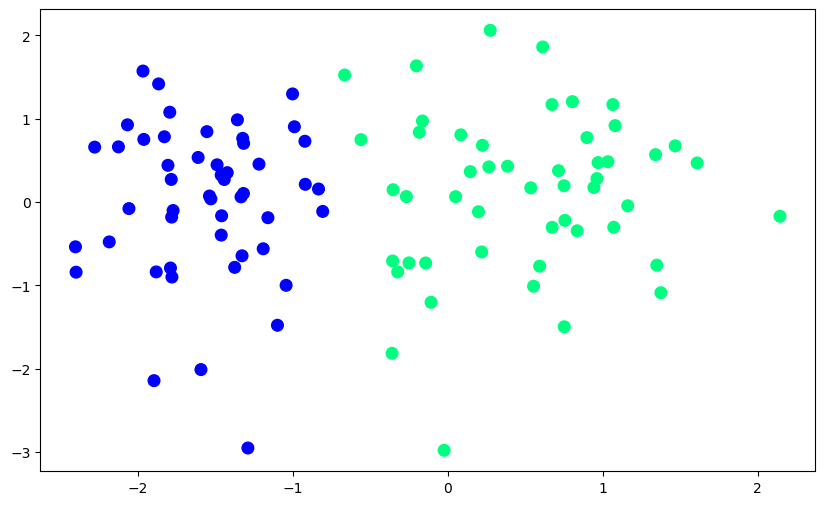

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=70)

In [36]:
def perceptron(X,y):
    X =np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    
    for i in range(100):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights +lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [37]:
np.dot(np.insert(X[42],0,1),[1,1,1])

0.6307593606887576

In [38]:
def step(z):
    return 1 if z>0 else 0

In [39]:
step(1.35)

1

In [42]:
intercept_,coef_ = perceptron(X,y)

In [43]:
print(coef_)
print(intercept_)

[1.30004225 0.14685073]
1.0


In [44]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [45]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

<IPython.core.display.Javascript object>


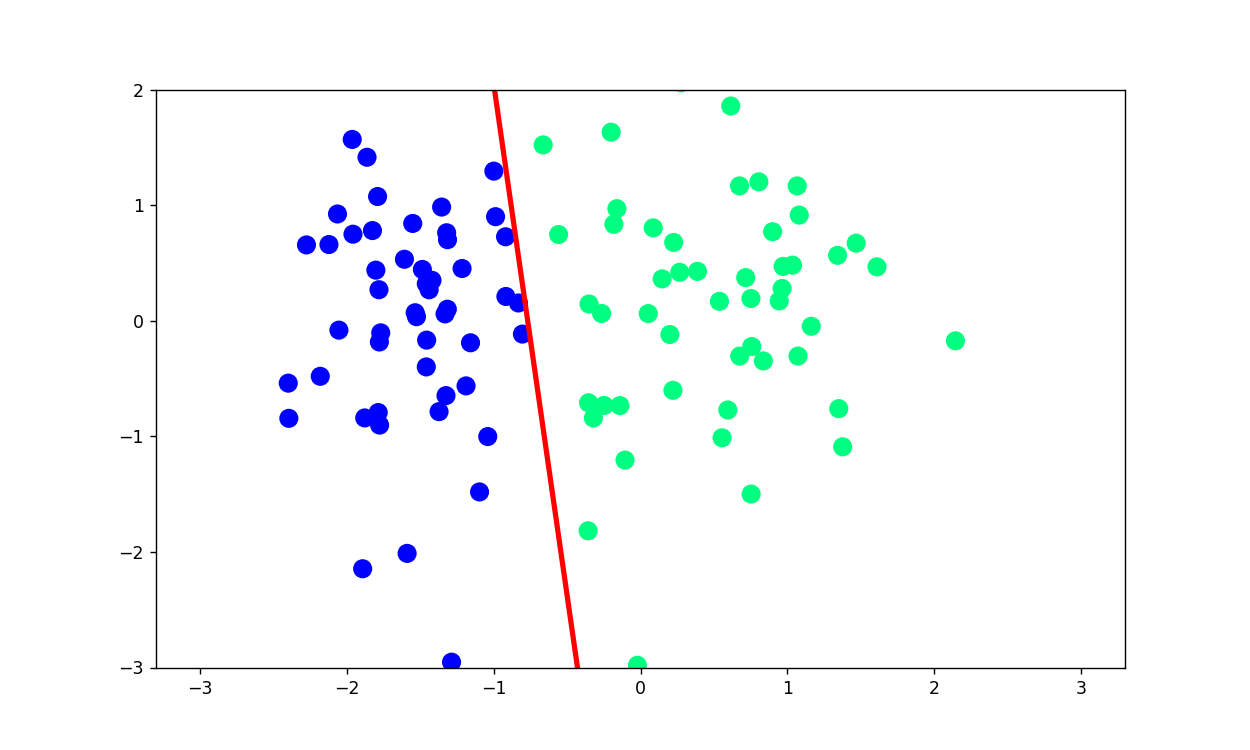

(-3.0, 2.0)

In [46]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color= 'red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [47]:
def perceptron(X,y):
    m = []
    b = []
    X =np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr =0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights = weights + lr *(y[j]-y_hat)*X[j]
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m,b

In [48]:
m,b = perceptron(X,y)

In [49]:
%matplotlib notebook
from matplotlib.animation import  FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


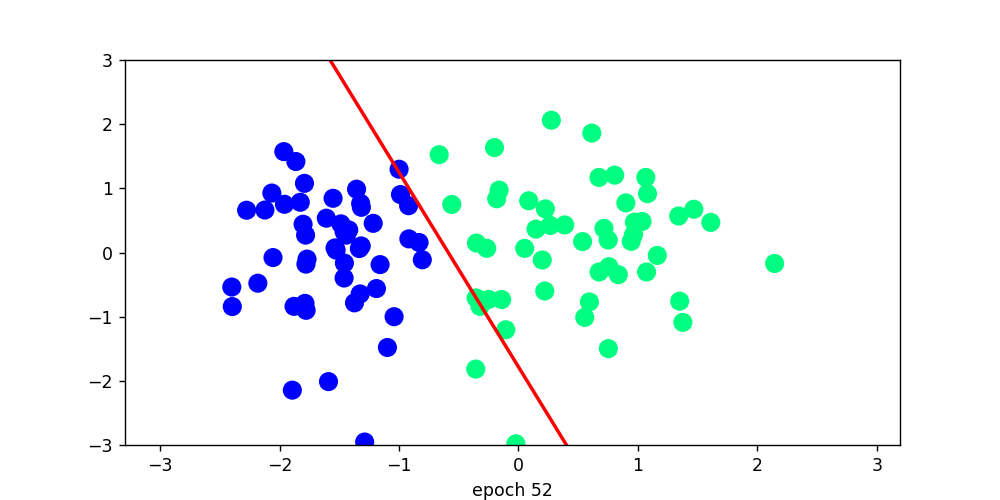

In [51]:
fig,ax = plt.subplots(figsize=(8,4))
x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0]+b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i,x_i*m[0]+b[0],'r-',linewidth=2)
plt.ylim(-3,3)
def update(i):
    label='epoch {0}'.format(i+1)
    line.set_ydata(x_i*m[i]+b[i])
    ax.set_xlabel(label)
    
anim =FuncAnimation(fig,update,repeat=True,frames=200,interval=100)